# Estudos com o gráfico de Pareto

In [38]:
# by geanclm in 05/02/2022 at 22:48h
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [39]:
df = pd.DataFrame({'ocorrência':[75, 33, 126, 60, 572, 19, 32, 650]})

In [40]:
df.index = ['Venda sem margem',
            'Material divergente',
            'Cancelamentos perdidos',
            'Compra errada',
            'Atraso de entrega',
            'Nfe difergente',
            'Valor errado',
            'Material com defeito']

In [41]:
df

,ocorrência
Venda sem margem,75
Material divergente,33
Cancelamentos perdidos,126
Compra errada,60
Atraso de entrega,572
Nfe difergente,19
Valor errado,32
Material com defeito,650


In [43]:
df.ocorrência.sum()

1567

In [44]:
df = df.sort_values(by='ocorrência', ascending=False)

In [45]:
df

,ocorrência
Material com defeito,650
Atraso de entrega,572
Cancelamentos perdidos,126
Venda sem margem,75
Compra errada,60
Material divergente,33
Valor errado,32
Nfe difergente,19


In [46]:
df["percentual acumulado"] = df["ocorrência"].cumsum()/df["ocorrência"].sum()*100

In [47]:
pd.options.display.float_format = "{:.2f}".format

In [48]:
650/1567

0.4148053605615826

In [49]:
df

,ocorrência,percentual acumulado
Material com defeito,650,41.48
Atraso de entrega,572,77.98
Cancelamentos perdidos,126,86.02
Venda sem margem,75,90.81
Compra errada,60,94.64
Material divergente,33,96.75
Valor errado,32,98.79
Nfe difergente,19,100.00


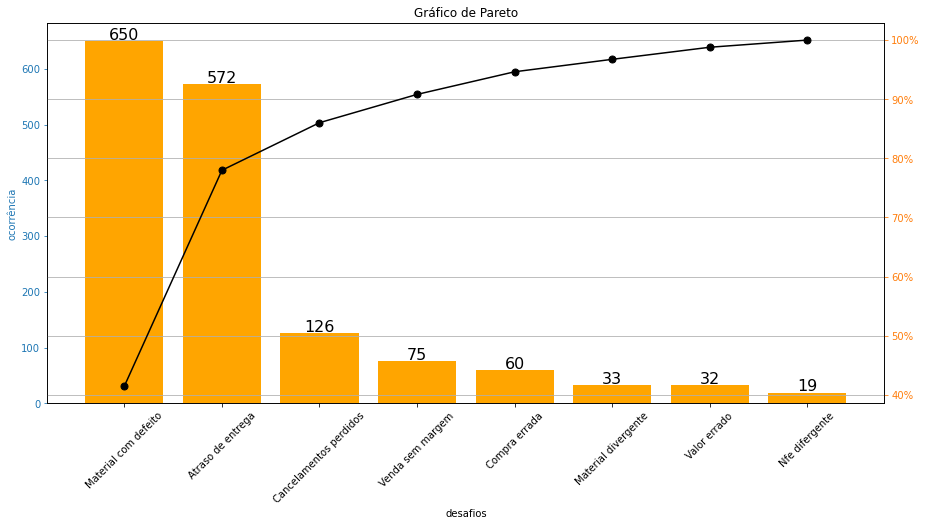

In [55]:
# indicadores em cada atributo do gráfico
# by geanclm in 15/02/2021 at 21:35h
fig, ax1 = plt.subplots(figsize=(15,7))

ax1.bar(df.index, df["ocorrência"], color="orange")
ax1.set_title('Gráfico de Pareto')
ax1.set_ylabel("ocorrência", color="C0")
ax1.set_xlabel("desafios")
ax1.tick_params(axis="y", colors="C0")

# indicadores em cada atributo do gráfico
# by geanclm in 15/02/2021 at 21:34h
for i, j in enumerate(df["ocorrência"]):
    plt.text(i, j+3, f'{j}', ha='center', fontsize=16)

for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2 = ax1.twinx()
ax2.plot(df.index, df["percentual acumulado"] , color="black", marker="o", ms=7)

ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis="y", colors="C1")
plt.grid()
plt.show();